In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.special
import math
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from matplotlib import cm
import time
from scipy.optimize import minimize

## Задание 7.

### 7.1 Метод случайного поиска

$$A = \{(x_1, x_2): x_1^2 + x_2^2 \leqslant 1\}$$
$$f(x) = x_1^3 \sin\frac{1}{x_1} + 10x_1 x_2^4\cos\frac{1}{x_2}$$

Пусть $(x_1, x_2)$ равномерно распределены на единичном круге, тогда:
$$
\mathbb{P}((x_1, x_2) \in A) = \frac{1}{\pi}\iint\limits_{x_1^2 + x_2^2 \leqslant 1} dx_1\,dx_2 = \left\{x_1 = r\cos \phi, \,x_2 = r\sin\phi \right\}\frac{1}{\pi}\int\limits_0^1 r\,dr \int\limits_0^{2\pi}d\phi = \int\limits_0^{2\pi}\frac{1}{2\pi}d\phi\int\limits_0^1dr^2.
$$
Значит, нужно сгенерировать:
$$
R \sim U[0, 1], \,\phi\sim U[0, 2\pi],
$$
тогда:
$$
r = \sqrt{R}.
$$

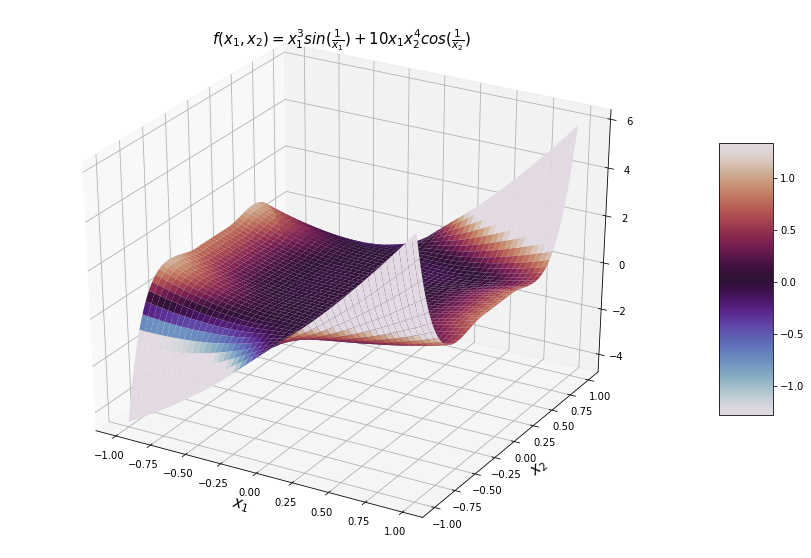

In [2]:
f = lambda x1, x2: x1**3*np.sin(1/x1)+10*x1*x2**4*np.cos(1/x2)
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
mask = x1**2 + x2**2 > 1
f_val = f(x1, x2)
f_val1 = f(x1, x2)
f_val1[mask] = np.nan
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, f_val, cmap='twilight', color='red', vmin=np.nanmin(f_val1), vmax=np.nanmax(f_val1))
#ax.set_zlim(np.nanmin(f_val1), np.nanmax(f_val1))
fig.colorbar(surf, shrink=0.5, aspect=5, cmap='twilight')
plt.title(r'$f(x_1, x_2) = x_1^3 sin(\frac{1}{x_1}) + 10 x_1 x_2^4 cos(\frac{1}{x_2})$', fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

Видим, что минимальные значения находятся на границе области, поэтому можем искать его не по всей области, а только по ее границе.

In [3]:
p = 0.99
n = 100000
R = np.ones(n)
r = np.sqrt(R)
phi = np.random.uniform(0, 2*np.pi, n) 
x1 = r*np.cos(phi)
x2 = r*np.sin(phi)
print('Ищем по границе области:')
print('Минимум = {0:0.4f}'.format(np.min(f(x1, x2))))
print('Погрешность = {0:0.4f}'.format(21*np.sqrt(p/n)))

Ищем по границе области:
Минимум = -1.2885
Погрешность = 0.0661


In [4]:
p = 0.99
n = 100000
R = np.random.uniform(0, 1, n)
r = np.sqrt(R)
phi = np.random.uniform(0, 2*np.pi, n) 
x1 = r*np.cos(phi)
x2 = r*np.sin(phi)
print('Ищем по всей области:')
print('Минимум = {0:0.4f}'.format(np.min(f(x1, x2))))
print('Погрешность = {0:0.4f}'.format(21*np.sqrt(p/n)))

Ищем по всей области:
Минимум = -1.2877
Погрешность = 0.0661


### 7.2 Метод имитации отжига.

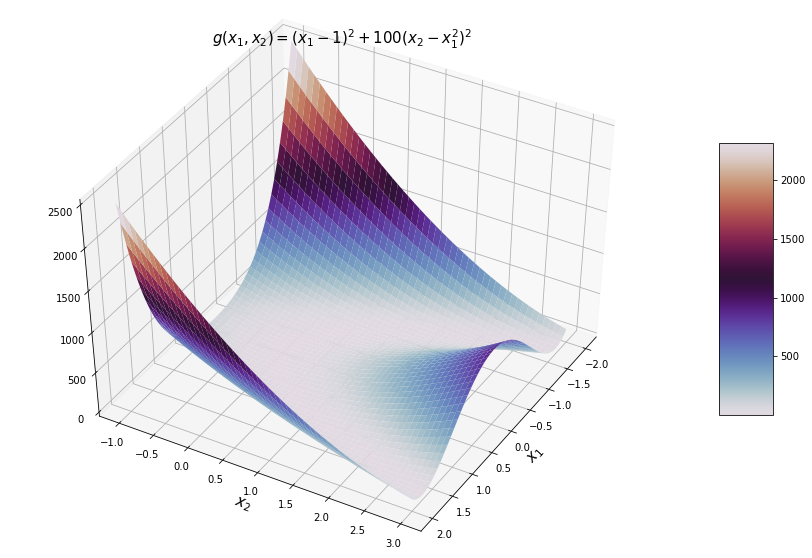

In [5]:
g = lambda x1, x2: (x1-1)**2 + 100*(x2-x1**2)**2
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-1, 3, 0.01)
x1, x2 = np.meshgrid(x1, x2)
g_val = g(x1, x2)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.view_init(45, 30)
surf = ax.plot_surface(x1, x2, g_val, cmap='twilight')
fig.colorbar(surf, shrink=0.5, aspect=5, cmap='twilight')
plt.title(r'$g(x_1, x_2) = (x_1-1)^2 + 100(x_2-x_1^2)^2$', fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

In [22]:
def method2(func, n=100, m=1000):
    mins = []
    n_list = np.arange(1, n, 1)
    for _ in n_list:
        p = [0, 0]
        t = 1
        k = 0
        min_value = np.inf
        for _ in range(m):
            x1, x2 = np.random.randn(2)*np.sqrt(t) + p
            val = func(x1, x2)
            if val >= min_value:
                prob = np.exp((min_value-val)/t)
                if np.random.randn(1) < prob:
                    p = [x1, x2]
                    min_value = val
                else:
                    k += 1
            else:
                p = [x1, x2]
                min_value = val
            t *= 0.9
        mins.append(min_value)
    return np.min(mins)

In [23]:
N_list = [100, 1000, 10000]
res = pd.DataFrame(columns=['N', 'Время работы', 'Минимум'])
for N in tqdm(N_list):
    i = np.arange(1, N+1)/N
    start = time.process_time()
    ans = method2(g, m=N)
    res.loc[len(res)] = [int(N), time.process_time()-start, ans]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.01s/it]


In [24]:
res

,N,Время работы,Минимум
0,100.0,0.140625,0.022022
1,1000.0,1.203125,0.004591
2,10000.0,13.484375,0.031578


### 7.3 Точность, сравнение результатов со стандартными методами оптимизации.

#### Метод случайного поиска:

Пусть $(x_1^*, x_2^*)$ - теоретическая точка минимума. Тогда:
$$
|f(x_1^*, x_2^*) - f(x, y)| \leqslant \max_{(x_1, x_2) \in A}|\nabla f|\,|(x_1^*, x_2^*) - (x_1, x_2)|.
$$
Для данной функции $f$:
$$
\left|\frac{\partial f}{\partial x_1}\right| = \left|3x_1^2\sin{\frac{1}{x_1}} - \frac{1}{x_1^2} x_1^3 \cos{\frac{1}{x_1}} + 10 x_2^4 \cos{\frac{1}{x_2}}\right| \leqslant |3x_1^2 -  x_1 + 10 x_2^4| =
$$
$$
= |3x_1^2 - x_1 + 10(1-x_1^2)^2| = |3x_1^2 - x_1 + 10(1 - 2x_1^2 + x_1^4)| =$$
$$= |10x_1^4 - 17x_1^2 - x_1 + 10| \leqslant 11
$$
$$
\left|\frac{\partial f}{\partial x_2}\right| = \left|40 x_1 x_2^3 \cos{\frac{1}{x_2}} + 10 \frac{1}{x_2^2} x_1 x_2^4 \sin{\frac{1}{x_2}} \right| \leqslant |40 x_1 x_2^3 + 10 x_1 x_2^2| =
$$
$$
= \left|40 x_1(1-x_1^2)^\frac{3}{2} + 10x_1(1 - x_1^2)\right| \leqslant 17
$$
$$
|\nabla f| = \sqrt{\left(\frac{\partial f}{\partial x_1}\right)^2 + \left(\frac{\partial f}{\partial x_2}\right)^2} \leqslant \sqrt{11^2 + 17^2} \leqslant 21.
$$

Пусть p - вероятность того, одна из n случайных точек попала в $\varepsilon$ - окрестность точки минимума функции f. Тогда (так как уже выяснили, что точка минимума лежит на границе множества):
$$
p = 1 - (1 - \varepsilon^2)^n \Rightarrow \varepsilon = \sqrt{1-(1-p)^\frac{1}{n}} \approx \sqrt{\frac{p}{n}}
$$

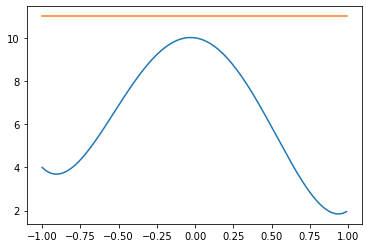

In [25]:
#отсюда взялась конечная оценка для df/dx1 
x = np.arange(-1, 1, 0.01)
plt.plot(x, np.abs(10*x**4 - 17*x**2 - x + 10))
plt.plot(x, np.full(x.shape, 11))
plt.show()

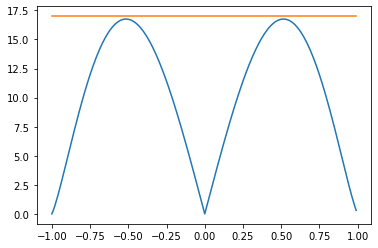

In [26]:
#отсюда взялась конечная оценка для df/dx2 
x = np.arange(-1, 1, 0.01)
plt.plot(x, np.abs(40*x*(1-x**2)**(3/2) + 10*x*(1-x**2)))
plt.plot(x, np.full(x.shape, 17))
plt.show()

Стандартные методы оптимизации скатываются в локальный минимум:

In [61]:
def func1(x):
    x1, x2 = x
    return f(x1, x2)

def jac1(x):
    x1, x2 =x
    J = np.zeros(2)
    J[0] = 3*x1**2*np.sin(1/x1) - x1*np.cos(1/x1) + 10*x2**4*np.cos(1/x2)
    J[1] = 40*x1*x2**3*np.cos(1/x2) + 10*x1*x2**2*np.sin(1/x2)
    return J
    
def hess1(x):
    x1, x2 = x
    H = np.zeros((2, 2))
    H[0, 0] = 6*x1*np.sin(1/x1) - np.sin(1/x1)/x1 - 4*np.cos(1/x1)
    H[0, 1] = 40*x2**3*np.cos(1/x2) + 10*x2**2*np.sin(1/x2)
    H[1, 0] = H[0, 1]
    H[1, 1] = 120*x1*x2**2*np.cos(1/x2) + 60*x1*x2*np.sin(1/x2) - 10*x1*np.cos(1/x2)
    return H
print('Усеченный метод Ньютона:')
res = minimize(func1, np.array([0.25, -0.5]), method='TNC', options={'disp': True}, jac=jac1, bounds=[(-1, 1), (-1, 1)])
print('Min: ', res.fun)
print('Argmin: ', res.x)

print('Метод Пауэлла: ')
res = minimize(func1, np.array([-0.8, -0.6]), method='Powell', options={'disp': True}, bounds=[(-1, 1), (-1, 1)])
print('Argmin: ', res.x)

Метод Ньютона:
Min:  -0.0835118682152517
Argmin:  [ 0.30430259 -0.48947434]
Метод Пауэлла: 
Optimization terminated successfully.
         Current function value: -0.083512
         Iterations: 3
         Function evaluations: 84
Argmin:  [ 0.30430239 -0.48947214]


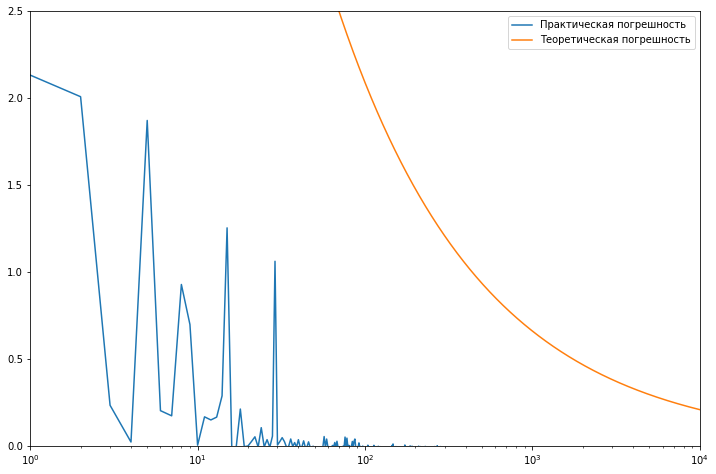

In [66]:
n = 10000
true_min = np.nanmin(f_val1)
res = []

R = np.random.uniform(0, 1, n)
r = np.sqrt(R)
phi = np.random.uniform(0, 2*np.pi, n) 
x1 = r*np.cos(phi)
x2 = r*np.sin(phi)
for i in range(n)[1:]:
    R = np.ones(i)
    r = np.sqrt(R)
    phi = np.random.uniform(0, 2*np.pi, i) 
    x1 = r*np.cos(phi)
    x2 = r*np.sin(phi)
    res.append(np.min(f(x1, x2)))
    
plt.figure(figsize=(12, 8))
plt.semilogx(range(n)[1:], np.array(res)-true_min, label='Практическая погрешность')
plt.semilogx(range(n)[1:], 21*np.sqrt(p/np.arange(1, n)), label='Теоретическая погрешность')
plt.ylim([0, 2.5])
plt.xlim([1, n])
plt.legend()
plt.show()

#### Метод имитации отжига:

С функцией Розенброка стандартные оптимизаторы справляются лучше:

In [71]:
def func2(x):
    x1, x2 = x
    return g(x1, x2)

def jac2(x):
    x1, x2 =x
    J = np.zeros(2)
    J[0] = 2*(x1-1) - 400*x1*(x2-x1**2)
    J[1] = 200*(x2-x1**2)
    return J

print('Усеченный метод Ньютона:')
res = minimize(func2, np.array([0.25, -0.5]), method='TNC', options={'disp': True}, jac=jac2)
print('Min: {0:0.3f}'.format(res.fun))
print('Argmin: ', res.x)

print('Метод Пауэлла: ')
res = minimize(func2, np.array([-0.8, -0.6]), method='Powell', options={'disp': True})
print('Argmin: ', res.x)

Усеченный метод Ньютона:
Min: 0.000
Argmin:  [0.99998747 0.99997489]
Метод Пауэлла: 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 311
Argmin:  [1. 1.]


## Задание 8.

Методом Монте-Карло найти решение первой краевой задачи для двумерного уравнения Лапласа в единичном круге:
$$
\begin{equation*}
 \begin{cases}
   \Delta u = 0, (x, y) \in D 
   \\
   u|_{\delta D} = f(x, y),
   \\
   u \in C^2(D), f\in C(\delta D),
   \\
   D = \{x, y: x^2 + y^2 \leqslant 1\}
 \end{cases}
\end{equation*}
$$

Граничные точки множества - точки, которые имеют менее четырех соседей, принадлежащих множеству:

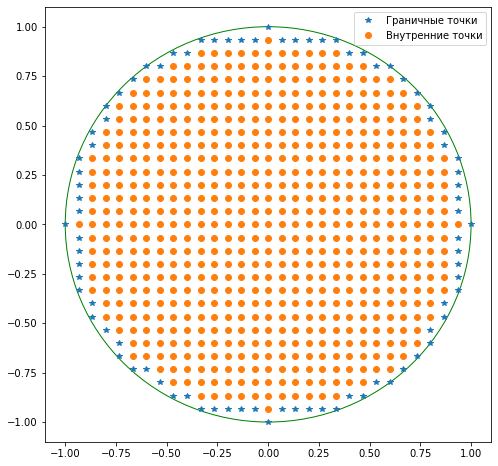

In [86]:
n = 30
h = 2/n
x = np.arange(-1, 1+h, h)
y = np.arange(-1, 1+h, h)
X, Y = np.meshgrid(x, y)
bounds_mask = ((X+h)**2 + Y**2 > 1) + ((X-h)**2 + Y**2 > 1) + (X**2 + (Y+h)**2 > 1) + (X**2 + (Y-h)**2 > 1)
set_mask = X**2 + Y**2 <= 1

plt.figure(figsize=(8, 8))
idx1, idx2 = np.nonzero(bounds_mask * set_mask)
plt.plot(x[idx1], y[idx2], '*', label='Граничные точки')
idx1, idx2 = np.nonzero(~bounds_mask * set_mask)
plt.plot(x[idx1], y[idx2], 'o', label='Внутренние точки')

ax=plt.gca()
circle1 = plt.Circle((0, 0), radius=1, color='g', fill=False)
ax.add_patch(circle1)
plt.legend()
plt.show()

Аналитическое решение для функции $f(x, y) = x^2 - y^2$:

Ищем решение в виде: $u(x, y) = Ax^2 + By^2 + C$. Тогда:
$$
u_{xx} + u_{yy} = 2A + 2B = 0 \Rightarrow A + B = 0\\
A(1 - y^2) + B y^2 + C = 1 - 2y^2 \Rightarrow A + C = 1,\, A-B = 2
$$
То есть: $A = 1, B = -1, C = 0.$

Аналитическое решение: $f(x, y) = x^2 - y^2.$

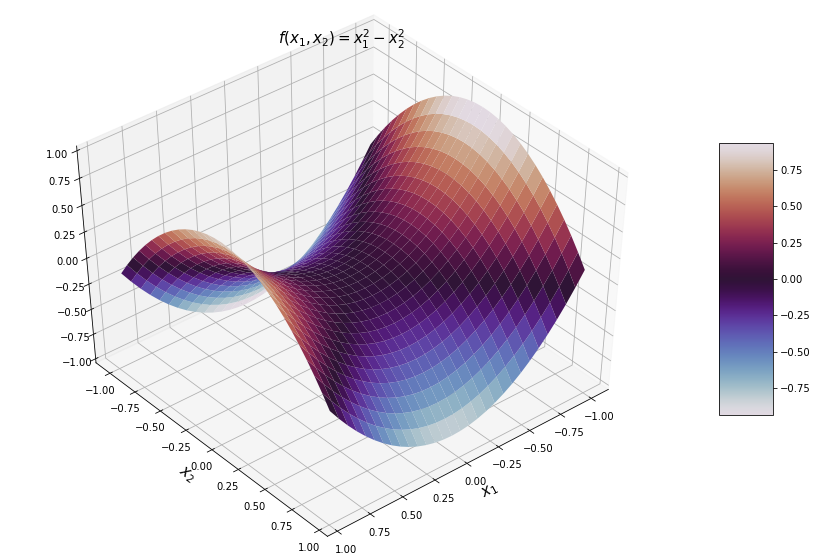

In [83]:
f = lambda x1, x2: x1**2 - x2**2
x1 = np.arange(-1, 1, h)
x2 = np.arange(-1, 1, h)
x1, x2 = np.meshgrid(x1, x2)
f_val = f(x1, x2)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.view_init(45, 50)
surf = ax.plot_surface(x1, x2, f_val, cmap='twilight')
fig.colorbar(surf, shrink=0.5, aspect=5, cmap='twilight')
plt.title(r'$f(x_1, x_2) = x_1^2 - x_2^2$', fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

Алгоритм:
- В граничных точках положим $u(x, y) = f(x, y)$.
- В внутренних точках будем переходим в одну из соседних точек, пока не достигнем граничной точки. Запустим этот процесс случайного блуждания n раз из каждой внутренней точки и положим $u(x, y) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i, y_i)$, где $(x_i, y_i)$ - одна из граничных точек, в которую мы попали в результате случайного блуждания.

In [103]:
def search_new_point(prev_point, max_n):
    res = prev_point + 2*np.round(np.random.rand(2)) - 1
    if res[0] < 0:
        res[0] = 0
    if res[1] < 0:
        res[1] = 0
    if res[0] > max_n-1:
        res[0] = max_n-2
    if res[1] > max_n-1:
        res[1] = max_n-2
    return res.astype(int)

In [118]:
np.random.randint(0, 3)

0

In [125]:
x = np.arange(-1, 1, step)
y = np.arange(-1, 1, step)
X, Y = np.meshgrid(x, y)
n = len(x)
V = np.zeros((n, n))
N = np.zeros((n, n))

step = 0.02
m = 200

threshold = np.sum(X**2 + Y**2 >= 1)

point = np.array([n/2, 0]).astype(int)
is_border = 1
f_val = f(x[point[0]], y[point[1]])

while np.sum(N < m) > threshold:
    point = search_new_point(point, n)
    if is_border:
        while x[point[0]]**2 + y[point[1]]**2 >= 1:
            point = search_new_point(point, n)

    if x[point[0]]**2 + y[point[1]]**2 < 1:
        V[point[0], point[1]] += f_val
        N[point[0], point[1]] += 1
        is_border = 0
    else:
        f_val = f(x[point[0]], y[point[1]])
        is_border = 1

<ipython-input-126-a51d96473e7d>:1: RuntimeWarning: invalid value encountered in true_divide
  ans = U / N
<ipython-input-126-a51d96473e7d>:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, ans, cmap='twilight', vmin=np.nanmin(ans), vmax=np.nanmax(ans))


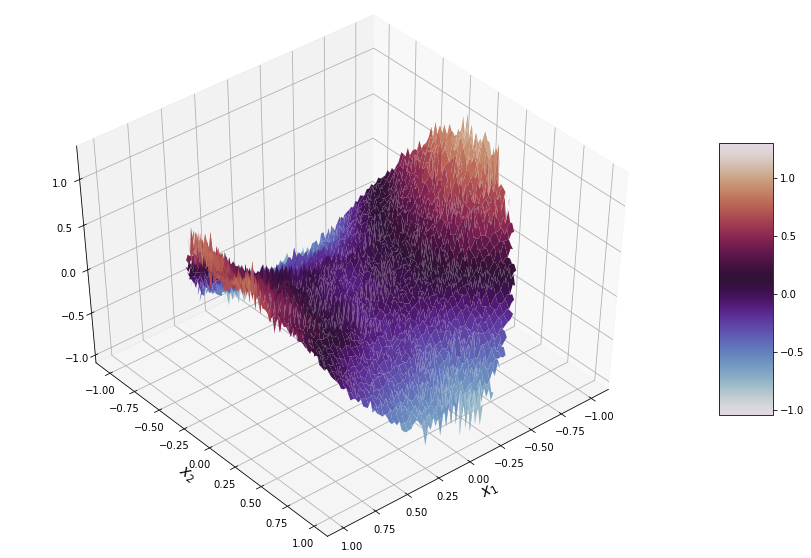

In [126]:
ans = U / N

fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.view_init(45, 50)
surf = ax.plot_surface(X, Y, ans, cmap='twilight', vmin=np.nanmin(ans), vmax=np.nanmax(ans))
fig.colorbar(surf, shrink=0.5, aspect=5, cmap='twilight')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

## Задание 9.

### 9.1 Винеровский процесс.

Рассмотрим винеровский процесс $W(t), \,t\in[0, 1], \, W(0) = 0.$

Случайный процесс $\{W_t\}_{t \in T}$ называется __гауссовским__, если для любых $t_1, \dots, t_n \in T \subset [0, +\infty)$ соответствующий случайный вектор $w = (W_{t_1}, W_{t_2}, \dots, W_{t_n})$ имеет многомерное нормальное распределение:
$$
\rho(W_{t_1}, \dots, W_{t_n}) = \frac{1}{(2\pi)^{\frac{n}{2}}|R|^{\frac{1}{2}}} e^{-\frac{1}{2}\langle R^{-1}(w-m), w-m\rangle},
$$
где $m = (m_1, \dots, m_n)^T$ - вектор средних, $R = \|cov(t_i, t_j)\|_{i, j}$ - ковариационная матрица.

__Винеровский процесс__ - гауссовский процесс с нулевым средним и ковариационной функцией: $cov(W(t_i), W(t_j)) = min\{t_i, t_j\}.$

Вычислим переходные вероятности для винеровского процесса:

Пусть $t = t_1 + \alpha(t_2 - t_1), \, \alpha \in (0, 1)$, тогда $t \in [t_1, t_2].$

Пусть $\tilde{x} = [x_1, x_2]^T, \, \hat{x} = [x_1, x, x_2]^T$. Тогда из определения гауссовского процесса:
$$
\rho_{W(t_1), W(t_2)}(\tilde{x}) = \frac{1}{2\pi\sqrt{|R_2|}} e^{-\frac{1}{2} \tilde{x}^T R_2^{-1} \tilde{x}},
$$
$$
\rho_{W(t_1), W(t), W(t_2)}(\hat{x}) = \frac{1}{(2\pi)^{\frac{3}{2}}\sqrt{|R_3|}} e^{-\frac{1}{2} \hat{x}^T R_3^{-1} \hat{x}},
$$
где $R_2 = \begin{bmatrix} t_1& t_1\\ t_1& t_2 \end{bmatrix}, \, R_3 = \begin{bmatrix} t_1& t_1& t_1\\ t_1& t& t\\ t_1& t& t_2 \end{bmatrix}$ -  ковариационные матрицы.

Тогда $|R_2| = t_1(t_2 - t_1), \, |R_3| = t_1(t - t_1)(t_2 - t)$. 

Обратные матрицы:
$$
R_2^{-1} = \begin{bmatrix} \frac{t_2}{t_1(t_2 - t_1)}& -\frac{1}{t_2 - t_1}\\ -\frac{1}{t_2 - t_1}& \frac{1}{t_2 - t_1} \end{bmatrix}, \, R_3^{-1} = \begin{bmatrix} \frac{t}{t_1(t-t_1)}& -\frac{1}{t-t_1}& 0\\ -\frac{1}{t-t_1}& \frac{t_2-t_1}{(t_2 - t)(t-t_1)}& -\frac{1}{t_2-t}\\0& -\frac{1}{t_2-t}& \frac{1}{t_2-t} \end{bmatrix}.
$$

Тогда:
$$
\rho_{W(t)}(x | W(t_1)=x_1, \,W(t_2) = x_2) = \frac{1}{\sqrt{2\pi(1-\alpha)(t_2 - t_1)}}\exp\left\{-\frac{(x-(1-\alpha)x_1 + \alpha x_2)^2}{2\alpha(1-\alpha)(t_2 - t_1)}\right\}.
$$

Заметим, что:

$W(t) \sim N(\sigma, a)$, где $\sigma = (1-\alpha)x_1 + \alpha x_2, \, a = \alpha(1-\alpha)(t_2 - t_1).$

In [226]:
# метод добавления разбиения отрезка
def weiner(t0, x0, t1, x1, lam, eps):
    if t1-t0 < eps:
        return np.concatenate((x0, x1)), np.concatenate((t0, t1))
    else:
        t = t0 + lam*(t1-t0)
        sigma = lam*(1 - lam)*(t1 - t0)
        a = x0 + lam*(x1-x0)
        x = np.random.randn(1)*np.sqrt(sigma) + a
        x_l, t_l = weiner(t0, x0, t, x, lam, eps)
        x_r, t_r = weiner(t, x, t1, x1, lam, eps)
        return np.concatenate((x_l, x, x_r)), np.concatenate((t_l, t, t_r))

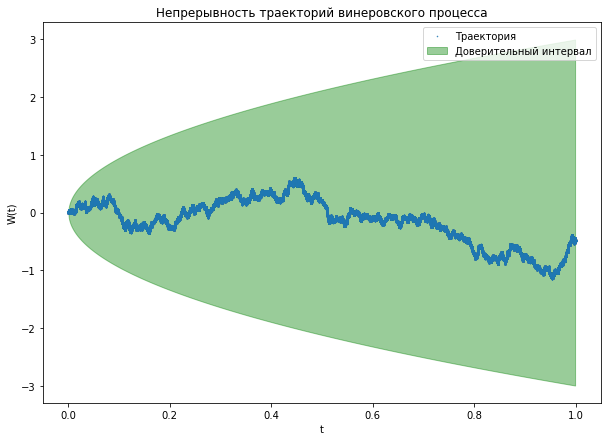

In [227]:
t0 = np.array([0])
t1 = np.array([1])
x0 = np.array([0])
x1 = np.random.randn(1)
lam = 0.2
eps = 0.00001

xs, times = weiner(t0, x0, t1, x1, lam, eps)
plt.figure(figsize=(10, 7))
plt.plot(times, xs, '.', markersize=1, label='Траектория')
x = np.arange(0, 1, 0.001)
plt.fill_between(x, 3*np.sqrt(x), -3*np.sqrt(x), color='g', edgecolor='g',
                 alpha=0.4, label='Доверительный интервал')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Непрерывность траекторий винеровского процесса')
plt.legend()
plt.show()

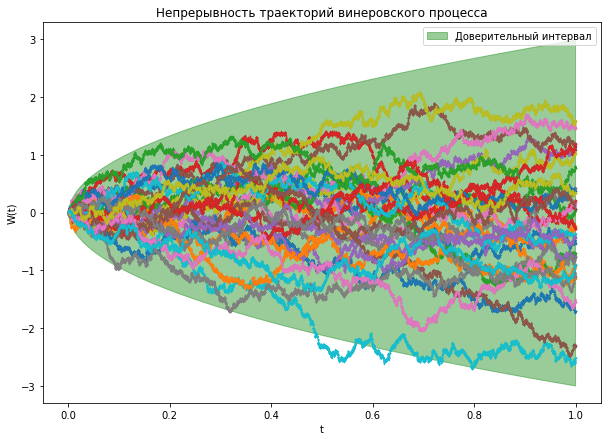

In [225]:
t0 = np.array([0])
t1 = np.array([1])
x0 = np.array([0])
lam = 0.4
eps = 0.0001

plt.figure(figsize=(10, 7))
x = np.arange(0, 1, 0.001)
plt.fill_between(x, 3*np.sqrt(x), -3*np.sqrt(x), color='g', edgecolor='g',
                 alpha=0.4, label='Доверительный интервал')
for i in range(30):
    x1 = np.random.randn(1)
    xs, times = weiner(t0, x0, t1, x1, lam, eps)
    plt.plot(times, xs, '.', markersize=0.5)
    
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Непрерывность траекторий винеровского процесса')
plt.legend()
plt.show()

### 9.2 Процесс Орнштейна-Уленбека.

__Процессом Орнштейна-Уленбека__ называется стационарный, марковский гауссовский процесс.

Из стационарности следует, что: $\mathbb{E}W(t) = const = \mu, \, R(t, s) = R(|s-t|)$.

Из того, что процесс марковский: $\rho(s, t) = \rho(s, \tau)\rho(\tau, t)$, где $\rho(s, t)$ - коэффициент корреляции случайных величин $W_s$ и $W_t$.

Пусть $\mathbb{V}ar W(t) = \sigma^2$. Тогда: $R(t, s) = \sigma^2 \rho(s, t)$.

Так как $R(t, s) = R(|s-t|)$, то $\rho(s, t) = \rho(s-t) \Rightarrow \rho(x+y) = \rho(x)\rho(y)$, где $x = s-\tau, \, y = \tau-t$.

__Теорема__:

Пусть функция $f(t)$ определена при $t>0$ и ограничена на каждом конечном интервале. Если $f(t)$ удовлетворяет соотношению $f(t+s)=f(t)f(s)$, то либо $f(t) \equiv 0$, либо $f(t) = e^{-\lambda t}$, где $\lambda = const > 0$.

Если $\rho(s, t) = e^{-\lambda |s-t|}$:

Пусть $\tilde{x} = (x_1, x_2)^T$.

Так как процесс Орнштейна-Уленбека гауссовский:
$$
\rho_{W(t), W(s)}(\tilde{x}) = \frac{1}{2\pi\sqrt{|R|}} e^{-\frac{1}{2} \tilde{x}^T R^{-1} \tilde{x}},
$$
$$
\rho_{W(s)}(x_2) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{x_2^2}{2\sigma^2}}.
$$
Ковариационная матрица:
$R = \begin{bmatrix} \sigma^2& \sigma^2 e^{-\lambda |s-t|}\\ \sigma^2 e^{-\lambda |s-t|}& \sigma^2 \end{bmatrix}.$

Тогда:
$$
\rho_{W(t)}(x_1|W(s) = x_2) = \frac{\rho_{W(t), W(s)}((x_1, x_2))}{\rho_{W(s)}(x_2)}= \frac{1}{\sigma\sqrt{2\pi\left(1 - e^{-2\lambda|t-s|}\right)}}exp\left\{-\frac{\left(x_1 - x_2 e^{-\lambda |t-s|}\right)^2}{2\sigma^2\left(1 - e^{-2\lambda|t-s|}\right)}\right\}.
$$

___Метод добавления разбиения отрезка___:

Будем действовать аналогично тому, как поступали с винеровским процессом. В данном случае будем делить отрезки пополам: $t = \frac{t_2-t_1}{2}$, ковариационные матрицы будут выглядеть следующим образом:

$R_2 = \sigma^2\begin{bmatrix} 1& e^{-\lambda(t_2-t_1)}\\ e^{-\lambda(t_2-t_1)}& 1 \end{bmatrix}, \, R_3 = \sigma^2\begin{bmatrix} 1& e^{-\lambda(t-t_1)}& e^{-\lambda(t_2-t_1)}\\ e^{-\lambda(t-t_1)}& 1& e^{-\lambda(t_2-t_1)}\\ e^{-\lambda(t_2-t_1)}& e^{-\lambda(t_2-t_1)}& 1 \end{bmatrix}$

В конечном итоге получим, что:
$$
W(t) \sim N\left((x_1 + x_2)\frac{e^{-\frac{\lambda(t_2-t_1)}{2}}}{1 + e^{-\lambda(t_2-t_1)}}, \sigma^2\frac{1-e^{-\lambda(t_2-t_1)}}{1+e^{-\lambda(t_2-t_1)}}\right).
$$

Если $\rho(t) \equiv 0$, то $cov(W(t), W(s)) \equiv 0$, поэтому, так как процесс $W(t)$ - гауссовский, $W(t)$ независимы в совокупности. В этом случае моделирование процесса Орнштейна-Уленбека заключается в моделировании случайных величин с распределением $N(a, \sigma^2).$

In [230]:
def ornstein_uhlenbeck(t0, x0, t1, x1, sigma, lam, eps):
    if t1-t0 < eps:
        return np.concatenate((x0, x1)), np.concatenate((t0, t1))
    else:
        t = t0 + 0.5*(t1-t0)
        sigma = sigma * (1 - np.exp(-lam * (t1-t0))) / (1 + np.exp(-lam  * (t1-t0)))
        a = (x0+x1)*np.exp(-lam*(t1-t0)/2)/(1 + np.exp(-lam*(t1-t0)))
        x = np.random.randn(1)*np.sqrt(sigma) + a
        x_l, t_l = ornstein_uhlenbeck(t0, x0, t, x, sigma, lam, eps)
        x_r, t_r = ornstein_uhlenbeck(t, x, t1, x1, sigma, lam, eps)
        return np.concatenate((x_l, x, x_r)), np.concatenate((t_l, t, t_r))

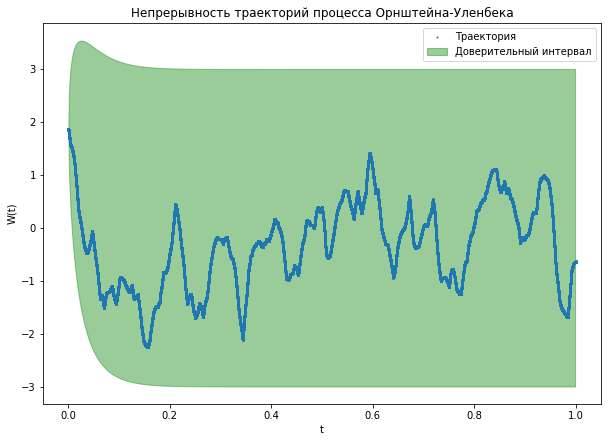

In [327]:
sigma = 1
lam = 25
eps = 0.00001
t0 = np.array([0])
t1 = np.array([1])
# x0 ~ N(0, sigma)
x0 = np.random.randn(1) * np.sqrt(sigma)
x1 = np.random.randn(1) * np.sqrt(sigma*(1 - np.exp(-2*lam*t1))) + x0*np.exp(-lam*t1)

x, t = ornstein_uhlenbeck(t0, x0, t1, x1, sigma, lam, eps)

plt.figure(figsize=(10, 7))
plt.plot(t, x, '.', markersize=2, label='Траектория')
times = np.arange(0, 1, 0.001)
plt.fill_between(times, x0*np.exp(-lam*times) - 3*np.sqrt(sigma*(1-np.exp(-2*lam*times))),
                 x0*np.exp(-lam*times) + 3*np.sqrt(sigma*(1-np.exp(-2*lam*times))), color='g', edgecolor='g',
                 alpha=0.4, label='Доверительный интервал')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Непрерывность траекторий процесса Орнштейна-Уленбека')
plt.legend()
plt.show()

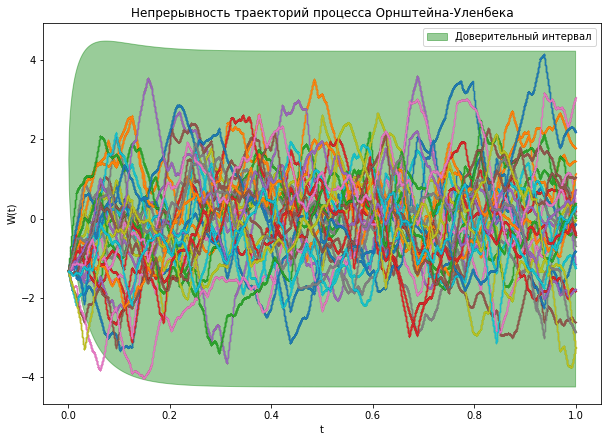

In [250]:
n = 50
sigma = 2
lam = 15
eps = 0.0001
t0 = np.array([0])
t1 = np.array([1])

plt.figure(figsize=(10, 7))
times = np.arange(0, 1, 0.001)
plt.fill_between(times, x0*np.exp(-lam*times) - 3*np.sqrt(sigma*(1-np.exp(-2*lam*times))),
                 x0*np.exp(-lam*times) + 3*np.sqrt(sigma*(1-np.exp(-2*lam*times))), color='g', edgecolor='g',
                 alpha=0.4, label='Доверительный интервал')
x0 = np.random.randn(1) * np.sqrt(sigma)
for i in range(30):
    #x0 = np.random.randn(1) * np.sqrt(sigma)
    x1 = np.random.randn(1) * np.sqrt(sigma*(1 - np.exp(-2*lam*t1))) + x0*np.exp(-lam*t1)
    x, t = ornstein_uhlenbeck(t0, x0, t1, x1, sigma, lam, eps)
    plt.plot(t, x, '.', markersize=0.3)
    
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Непрерывность траекторий процесса Орнштейна-Уленбека')
plt.legend()
plt.show()

## Задание 10.

Пусть:

$x_{n+1} = a x_n + \nu_n,$ где $\nu_n \sim N(0, q), \, x_1 \sim N(0, \sigma^2)$

$y_n = x_n + \varepsilon_n,$ где $\varepsilon_n \sim N(0, r).$

Зная параметры $\sigma$ и $\lambda$, найдем параметры $a, q$:

$R(t_n, t_n) = \sigma^2 = \mathbb{V}ar(x_n)$

$R(t_n, t_{n+1}) = \sigma^2 e^{-\lambda(t_{n+1}-t_n)} = Cov(x_n, x_{n+1}) = a \mathbb{V}ar(x_n) = a \sigma^2$

$R(t_{n+1}, t_{n+1}) = \sigma^2 = \mathbb{V}ar(x_{n+1}) = a^2 \mathbb{V}ar(x_n) + q = a^2 \sigma^2 + q.$

Отсюда следует, что: $a = e^{-\lambda(t_{n+1}-t_n)}, \, q = \sigma^2(1 - e^{-2\lambda(t_{n+1}-t_n)})$

Будем восстанавливать значения $x$ по следующему алгоритму:
- $x_{0|0} = \mathbb{E}x_0 = 0$
- $R_{0|0} = \mathbb{V}ar x_0 = \sigma^2$
- $x_{k+1|k} = a x_{k|k}$
- $R_{k+1|k} = a^2 R_{k|k} + q$
- $x_{k+1|k+1} = x_{k+1|k}\left(1 - \frac{R_{k+1|k}}{R_{k+1|k} + r}\right) + \frac{R_{k+1|k}}{R_{k+1|k} + r}y_{k+1}$
- $R_{k+1|k+1} = R_{k+1|k}\left(1 - \frac{R_{k+1|k}}{R_{k+1|k} + r}\right)$

In [400]:
def kalman_filter(t, y, lam, sigma, r):
    a = np.exp(-lam*(t[1] - t[0]))
    q = sigma*(1 - a**2)
    res = [0]
    R = [sigma]
    for i in list(range(len(y)))[1:]:
        predicted_x = a*res[-1]
        predicted_R = a**2*R[-1] + q    
        delta = predicted_R / (predicted_R + r)
        res.append((1 - delta)*predicted_x + y[i]*delta)
        R.append((1 - delta)*predicted_R)
    return res, R

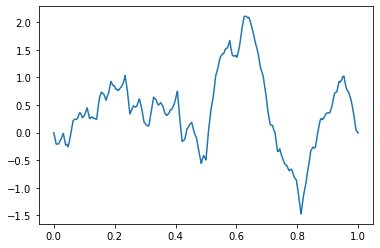

In [401]:
sigma = 1
lam = 12
t0 = np.array([0])
t1 = np.array([1])
eps = 0.0001

x0 = np.random.randn(1) * np.sqrt(sigma)
x1 = np.random.randn(1) * np.sqrt(sigma * (1-np.exp(-2*lam*t1))) + x0*np.exp(-lam*t1)
x, t = ornstein_uhlenbeck(t0, x0, t1, x1, sigma, lam, eps)

plt.plot(t, x)
plt.show()

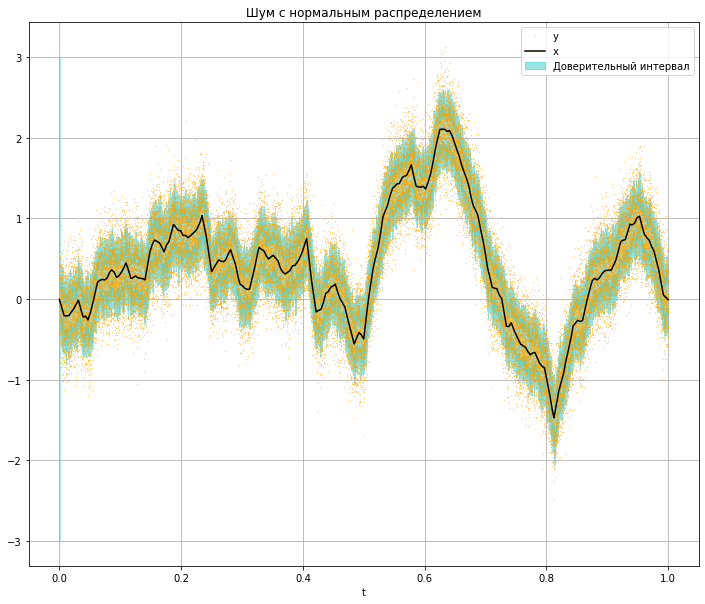

In [417]:
r = 0.1
v = np.sqrt(r)*np.random.randn(len(x))
y = x + v
res, R = kalman_filter(t, y, lam, sigma, r)

plt.figure(figsize=(12, 10))
plt.plot(t, y, '.', label='y', markersize=0.4, color='orange')
plt.plot(t, x, label='x', linewidth=1.5, color='black')
plt.fill_between(t, res - 3*np.sqrt(R), res + 3*np.sqrt(R),alpha=0.4, color='c', label='Доверительный интервал')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.title('Шум с нормальным распределением')
plt.show()

In [403]:
def cauchy(a, b, *shape):
    if len(shape) == 1:
        return a + b*np.tan(np.pi*(rand.uniform(0, 1, shape[0]) - 0.5))
    else:
        return a + b*np.tan(np.pi*(rand.uniform(0, 1, shape) - 0.5))

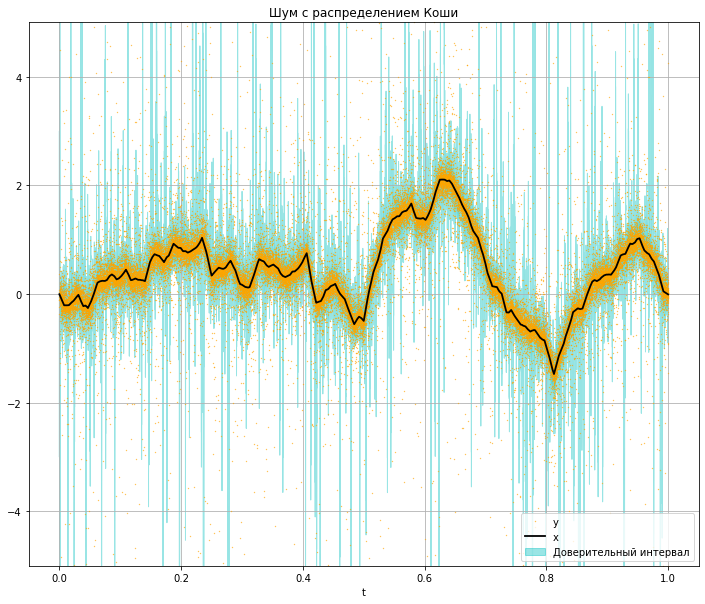

In [419]:
r = 0.1
v = cauchy(0, r, len(x))
y = x + v
res, R = kalman_filter(t, y, lam, sigma, r)
plt.figure(figsize=(12, 10))
plt.plot(t, y, '.', label='y', markersize=0.6, color='orange')
plt.plot(t, x, label='x', linewidth=1.8, color='black')
plt.fill_between(t, res - 3*np.sqrt(R), res + 3*np.sqrt(R), color='c',
                 alpha=0.4, label='Доверительный интервал')
plt.legend()
plt.xlabel('t')
plt.ylim(-5, 5)
plt.grid()
plt.title('Шум с распределением Коши')
plt.show()

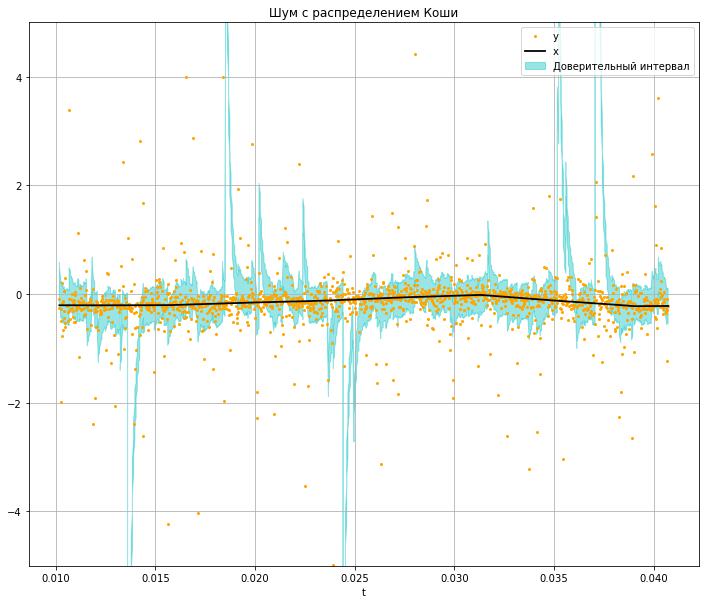

In [424]:
# приближение предыдущего графика

plt.figure(figsize=(12, 10))
plt.plot(t[500:2000], y[500:2000], '.', label='y', markersize=4, color='orange')
plt.plot(t[500:2000], x[500:2000], label='x', linewidth=1.8, color='black')
plt.fill_between(t[500:2000], res[500:2000] - 3*np.sqrt(R[500:2000]), res[500:2000] + 3*np.sqrt(R[500:2000]), color='c',
                 alpha=0.4, label='Доверительный интервал')
plt.legend()
plt.ylim(-5, 5)
plt.xlabel('t')
plt.grid()
plt.title('Шум с распределением Коши')
plt.show()

## Задание 11.

### 11.1 Система массового обслуживания (СМО).

Рассмотрим систему на отрезке времени $[0, T]$. Будем генерировать $t_i \sim U[0, T]$ - времена поступления заявок, $s_i \sim \chi^2(10)$ - времена обработки заявок.

Тогда время окончания обработки $i$-ой заявки:
$$
Q_i = \begin{equation*}
 \begin{cases}
   t_i + s_i,&\text{если обработка $(i-1)$ - ой заявки в момент времени $t_i$ уже завершена,} 
   \\
   Q_{i-1} + s_i,&\text{иначе.}
 \end{cases}
\end{equation*}
$$

То есть: $Q_i = t_i + max\{0, \,Q_{i-1} - t_i\} + s_i.$

Будем подсчитывать количество заявок, ожидающих обработки, во время поступления новой заявки:
$$
n_i - \text{количество заявок $j$, таких, что} \begin{equation*}
 \begin{cases}
   j<i, 
   \\
   Q_j > t_i.
 \end{cases}
\end{equation*} 
$$

Так как $\delta_i = (t_{i+1} - t_i) \sim Exp(\lambda)$. Тогда $\mathbb{E}\delta_i = \frac{1}{\lambda}$ - среднее время между поступлениями заявок. При этом среднее время обработки заявки: $\mathbb{E}s_i = 10$.

Тогда:
- если $\frac{1}{\lambda} = 10$, то скорость поступления заявок совпадает со скоростью их обработки,


- если $\frac{1}{\lambda} > 10$, то скорость обработки заявок превышает скорость их поступления,


- если $\frac{1}{\lambda} < 10$, то заявки не успевают обрабатываться и накапливаются в очереди.

In [436]:
def chi2rnd(n, *shape):
    if len(shape) == 1:
        xi = np.random.randn(n, shape[0])
    else:
        xi = np.random.randn(n, shape)
    return np.sum(xi**2, axis=0)

In [531]:
max_t  = 100
lam = 0.3
n = 200

t = np.sort(np.random.rand(np.random.poisson(lam*max_t)) * max_t)
s = chi2rnd(10, len(t))
Q = [t[0] + s[0]]

for i in list(range(len(t)))[1:]:
    Q.append(t[i] + max(0, Q[-1] - t[i]) + s[i])

times = np.linspace(0, max_t, n)
N = np.zeros(n)
for i in range(len(t)):
    N += (times > t[i])*(Q[i] > times)

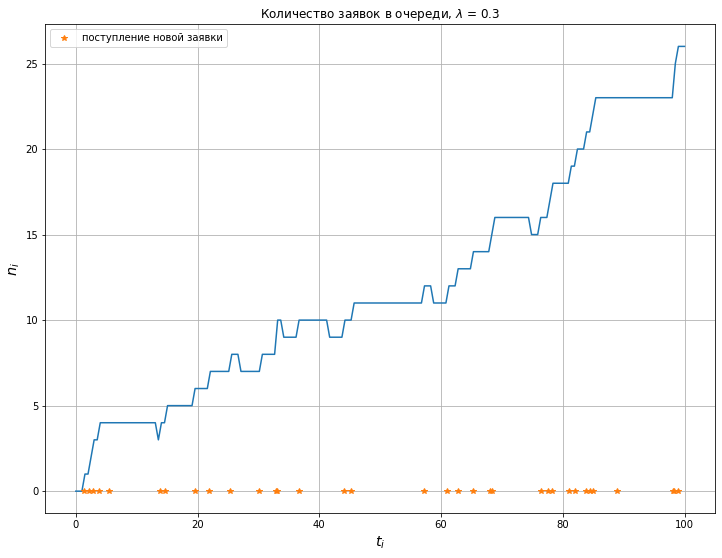

In [532]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

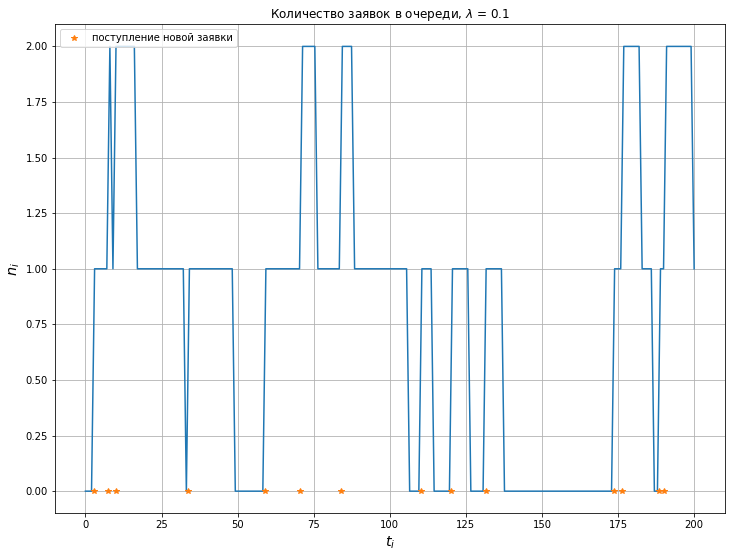

In [528]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

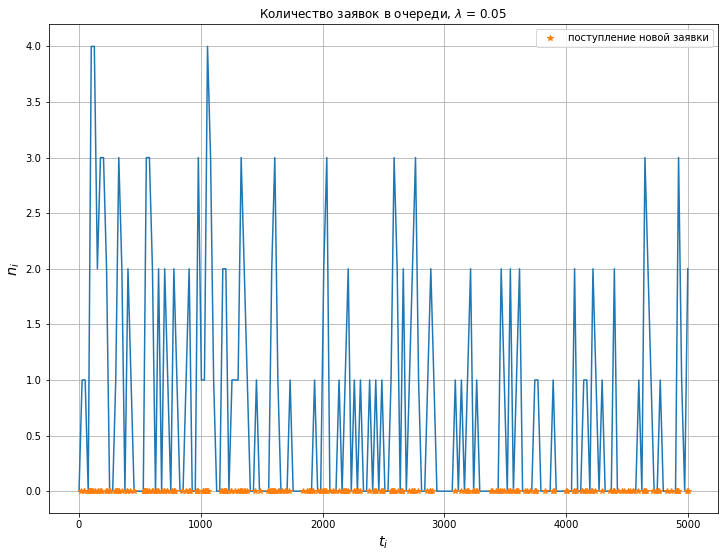

In [530]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

### 11.2 Моделирование СМО с циклической активностью.

Будем генерировать $t_i \sim U[0, T]$ - времена поступления заявок, $s_i \sim \chi^2(10)$ - времена обработки заявок.

Введем обозначение:

$\lambda(t) = \lambda(1 + cos(t)) \leqslant 2\lambda = \lambda^*.$

Тогда по методу Льюиса и Шедлеара оставим $t_i$ с вероятностью $\displaystyle\frac{\lambda(t_i)}{\lambda^*}$:

- Пусть $\xi \sim U[0, 1]$, тогда: $ P\left(\xi < \displaystyle\frac{\lambda(t_i)}{\lambda^*}\right) = F_{\xi}(\displaystyle\frac{\lambda(t_i)}{\lambda^*}) = \displaystyle\frac{\lambda(t_i)}{\lambda^*}.$ Поэтому будем оставлять только те $t_i$, для которых выполнено: $\xi_i < \displaystyle\frac{\lambda(t_i)}{\lambda^*}.$

Поведение системы системы в зависимости от значений параметра $\lambda$ остается тем же, что и в обычной системе массового обслуживания, так как средняя мгновенная интенсивность сохраняется: она равна $\lambda$.

In [567]:
#max_t  = 70*np.pi
max_t = 10*np.pi
lam = 0.8
#n = 500
n = 100

t = np.sort(np.random.rand(np.random.poisson(2*lam*max_t)) * max_t)
new_lam = lam*(1+np.cos(t))

t = t[np.where(np.random.rand(len(t)) < new_lam/(2*lam))]
s = chi2rnd(10, len(t))
Q = [t[0] + s[0]]

for i in list(range(len(t)))[1:]:
    Q.append(t[i] + max(0, Q[-1] - t[i]) + s[i])

times = np.linspace(0, max_t, n)
N = np.zeros(n)
for i in range(len(t)):
    N += (times > t[i])*(Q[i] > times)

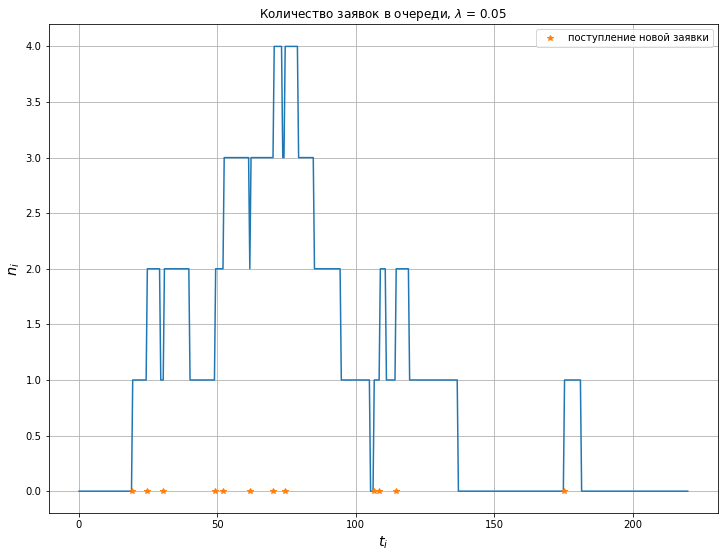

In [554]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

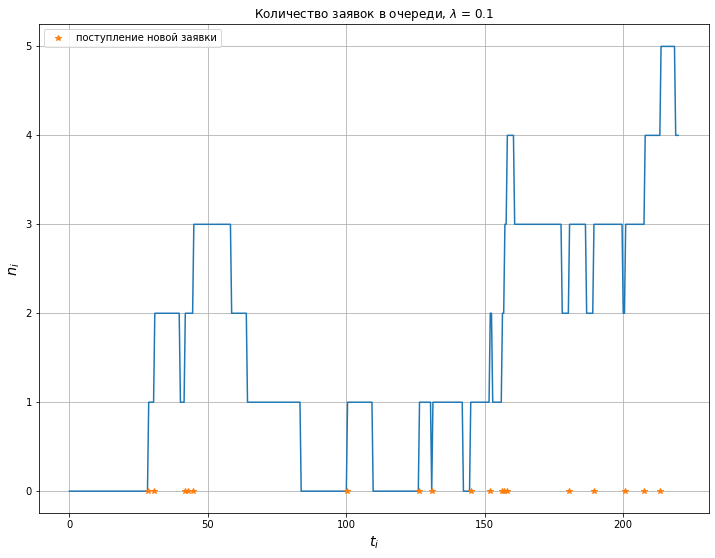

In [562]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

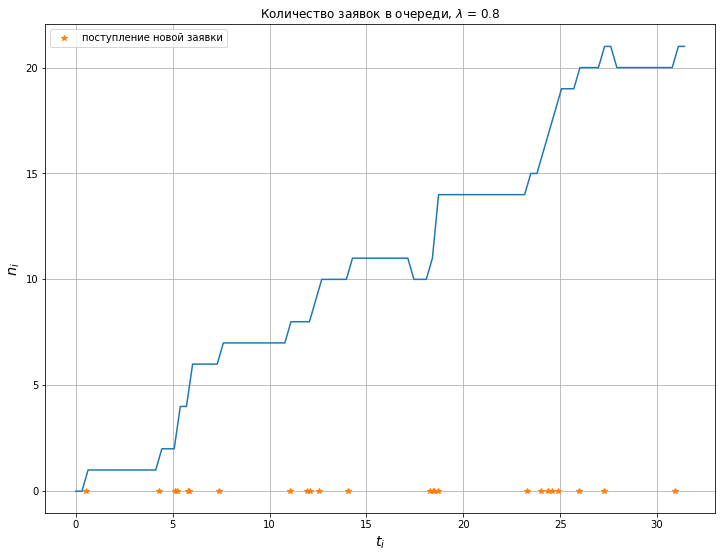

In [568]:
plt.figure(figsize=(12, 9))
plt.plot(times, N)
plt.plot(t, np.zeros(len(t)), "*", label='поступление новой заявки')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$n_i$', fontsize='x-large')
plt.title('Количество заявок в очереди, $\lambda$ = {0}'.format(lam))
plt.legend()
plt.show()

### 11.3 Моделирование работы страховой компании.

Функция распределения Парето:
$$
\xi \sim P(x_m, k) \Rightarrow F_{\xi}(x) = 1 - \left(\frac{x_m}{x}\right)^k \Rightarrow F_{\xi}^{-1}(x) = \frac{x_m}{(1-x)^\frac{1}{k}}.
$$

In [569]:
def pareto(xm, k, *shape):
    if len(shape) == 1:
        xi = np.random.rand(shape[0])
    else:
        xi = np.random.rand(shape)
    return xm/xi**(1/k)


Будем генерировать $t_i \sim Pois(\lambda), \, s_i \sim P(x_m, k)$.

Тогда величина капитала страховой компании: $W(t) = W(0) + ct - s(t)$, где $s(t) = \sum\limits_{t_i<t}s_i$

Страховая компания разорится в момент времени: $T = min\{t>0 | W(t) < 0\}$

Из того, что $(t_{i+1}-t_i) \sim Exp(\lambda), \, \mathbb{E}s_i = \displaystyle\frac{k x_m}{k-1}$, получим:

$$\mathbb{E}W'(t) = c - \mathbb{E}'s(t) = c - \left(\sum\limits_{t_i<t} \mathbb{E}s_i\right)' = c - \left(t\lambda \frac{k x_m}{k-1}\right)' = c - \lambda \frac{k x_m}{k-1}.$$

Откуда следует, что:
- При $c(k-1) = \lambda k x_m$ капитал страховой системы не изменяется,


- При $c(k-1) < \lambda k x_m$ капитал будет уменьшаться,


- При $c(k-1) > \lambda k x_m$ капитал будет увеличиваться.

In [592]:
n = 1000
lam  = 0.1 # 1 > 0.2
lam = 0.5 # 1 = 1
lam = 1 # 1 < 2
xm = 1
k = 2
W0 = 100
c = 1
max_t = 100

t = np.sort(np.random.rand(np.random.poisson(lam*max_t)) * max_t)
s = pareto(xm, k, len(t))
times = np.linspace(0, max_t, n)
S = np.zeros(n)
for i in range(len(t)):
    S += (times >= t[i])*s[i]
W = W0 + c*times - S 
idx = np.where(W<0)[0]
if len(idx) > 0:
    W[idx[0]:] = 0

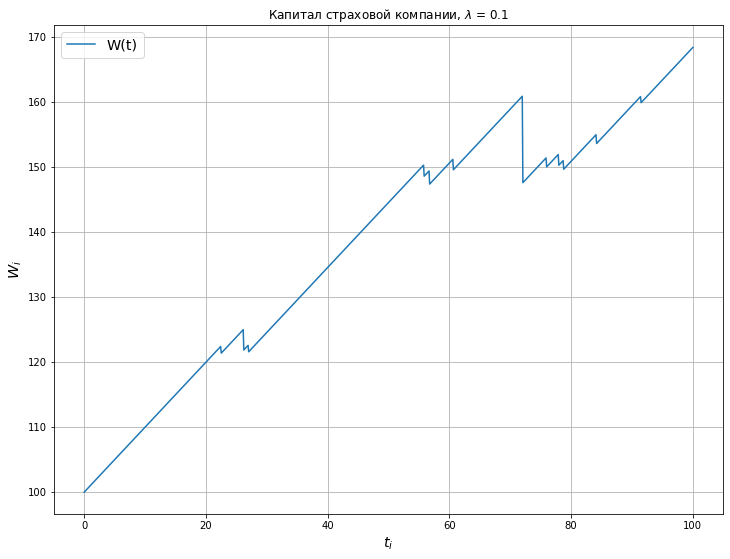

In [589]:
plt.figure(figsize=(12, 9))
plt.plot(times, W, label='W(t)')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$W_i$', fontsize='x-large')
plt.title('Капитал страховой компании, $\lambda$ = {0}'.format(lam))
plt.legend(fontsize='x-large')
plt.show()

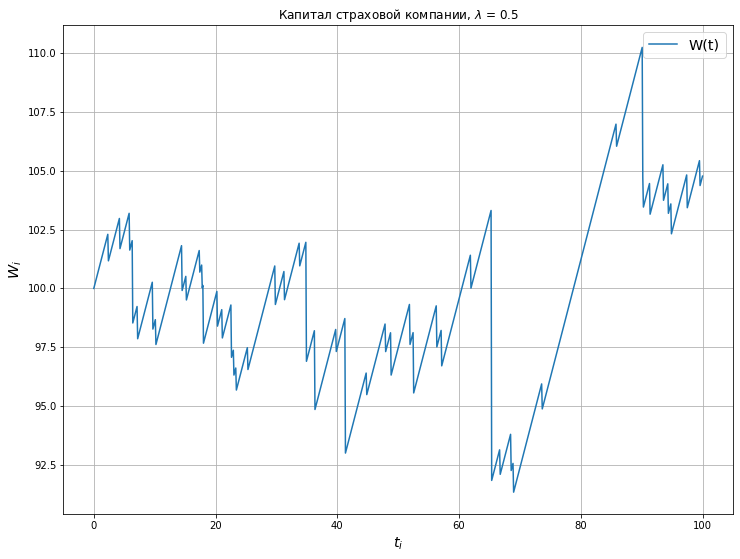

In [591]:
plt.figure(figsize=(12, 9))
plt.plot(times, W, label='W(t)')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$W_i$', fontsize='x-large')
plt.title('Капитал страховой компании, $\lambda$ = {0}'.format(lam))
plt.legend(fontsize='x-large')
plt.show()

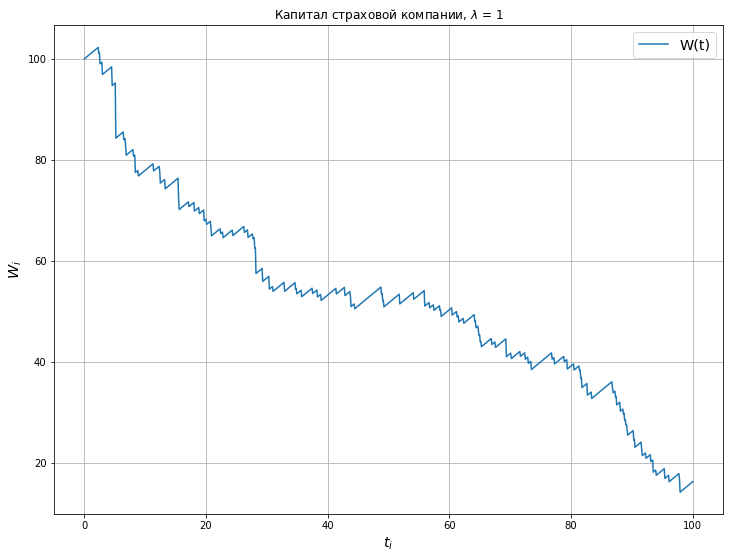

In [593]:
plt.figure(figsize=(12, 9))
plt.plot(times, W, label='W(t)')
plt.grid()
plt.xlabel(r'$t_i$', fontsize='x-large')
plt.ylabel(r'$W_i$', fontsize='x-large')
plt.title('Капитал страховой компании, $\lambda$ = {0}'.format(lam))
plt.legend(fontsize='x-large')
plt.show()